In [ ]:
%load_ext autoreload
%autoreload 2
# default_exp indexers.facerecognition.facerecognition_indexer

In [ ]:
# export
from integrators.data.schema import *
from integrators.data.basic import *
from integrators.data.itembase import *
from integrators.pod.client import PodClient
from integrators.indexers.indexer import IndexerBase, get_indexer_run_data, IndexerData, test_registration
from integrators.indexers import *
from integrators.imports import *
from integrators.indexers.facerecognition.photo import *
from fastprogress.fastprogress import progress_bar

# FaceRecognitionIndexer

In [ ]:
# export
from insightface.model_zoo.face_recognition import arcface_r100_v1
from insightface.model_zoo.face_detection   import retinaface_r50_v1
from insightface.model_zoo.face_genderage   import genderage_v1
from insightface.app.face_analysis          import FaceAnalysis
from insightface.utils import face_align

In [ ]:
# export
class FaceRecognitionIndexer(IndexerBase):
    """Recognizes photos from faces."""
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.recognition_model = arcface_r100_v1()
        self.recognition_model.prepare(-1);
        self.detection_model = retinaface_r50_v1()
        self.detection_model.prepare(-1);

    def compare(self, img1, img2):
        sim = round(float(self.recognition_model.compute_sim(img1, img2)), 2)
        return sim
        
    def predict_boundingboxes(self, iphoto):
        boxes, landmarks = self.detection_model.detect(iphoto.data)
        return boxes, landmarks
    
    def get_embedding(self, img, normalized=True):
        x = img.data if isinstance(img, IPhoto) else img
        return self.recognition_model.get_embedding(x).flatten()
    
    def get_crops(self, photos):
        crop_photos = []
        for i, photo in enumerate(progress_bar(photos)):
            boxes, landmarks = self.predict_boundingboxes(photo)
            crop_photos += [IPhoto.from_np(c) for c in photo.get_crops(boxes, landmarks)]
        return crop_photos

# Usage

## Creating images

In [ ]:
# hide_output
indexer = FaceRecognitionIndexer()

[32, 16, 8] {'32': {'SCALES': (32, 16), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '16': {'SCALES': (8, 4), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '8': {'SCALES': (2, 1), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}}
use_landmarks True


In [ ]:
photo = IPhoto.from_path(path=PYI_TESTDATA / "photos" / "facerecognition" / "celebs.jpg")
boxes, landmarks = indexer.predict_boundingboxes(photo)

Plotting 12 face boundingboxes


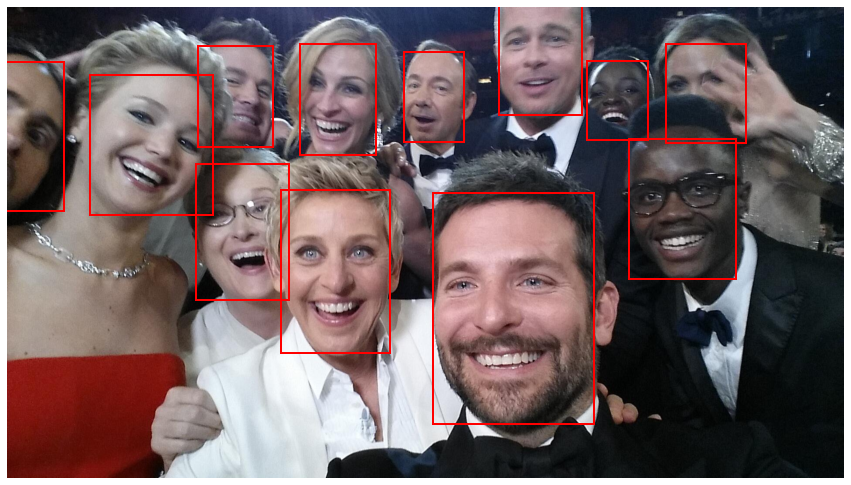

In [ ]:
photo.draw_boxes(boxes)

In [ ]:
crops = photo.get_crops(boxes, landmarks)

Lets get two random faces from our photo

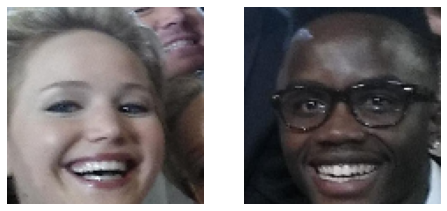

In [ ]:
show_images([crops[0], crops[1]])

And check if they are the same

In [ ]:
try:
    similarity =  indexer.compare(crops[0], crops[1])
    assert similarity < 0.5
finally:
    print("Not the same person")


Not the same person


## Compute similarity for photo's of the same person

In [ ]:
ellen1 = IPhoto.from_path(path=PYI_TESTDATA / "photos" / "facerecognition" / "ellen1.png")
ellen2 = IPhoto.from_path(path=PYI_TESTDATA / "photos" / "facerecognition" / "ellen2.png")

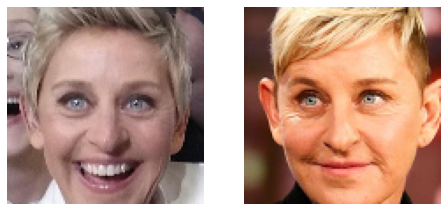

In [ ]:
show_images([ellen1.data, ellen2.data])

In [ ]:
try:
    sim = indexer.compare(ellen1.data, ellen2.data)
    assert sim > 0.5
finally:
    print("Same person")

Same person


## Plotting crops

When we plot the crops, we see that our model actually is doing some magic behind the scenes to normalize and scale our images.

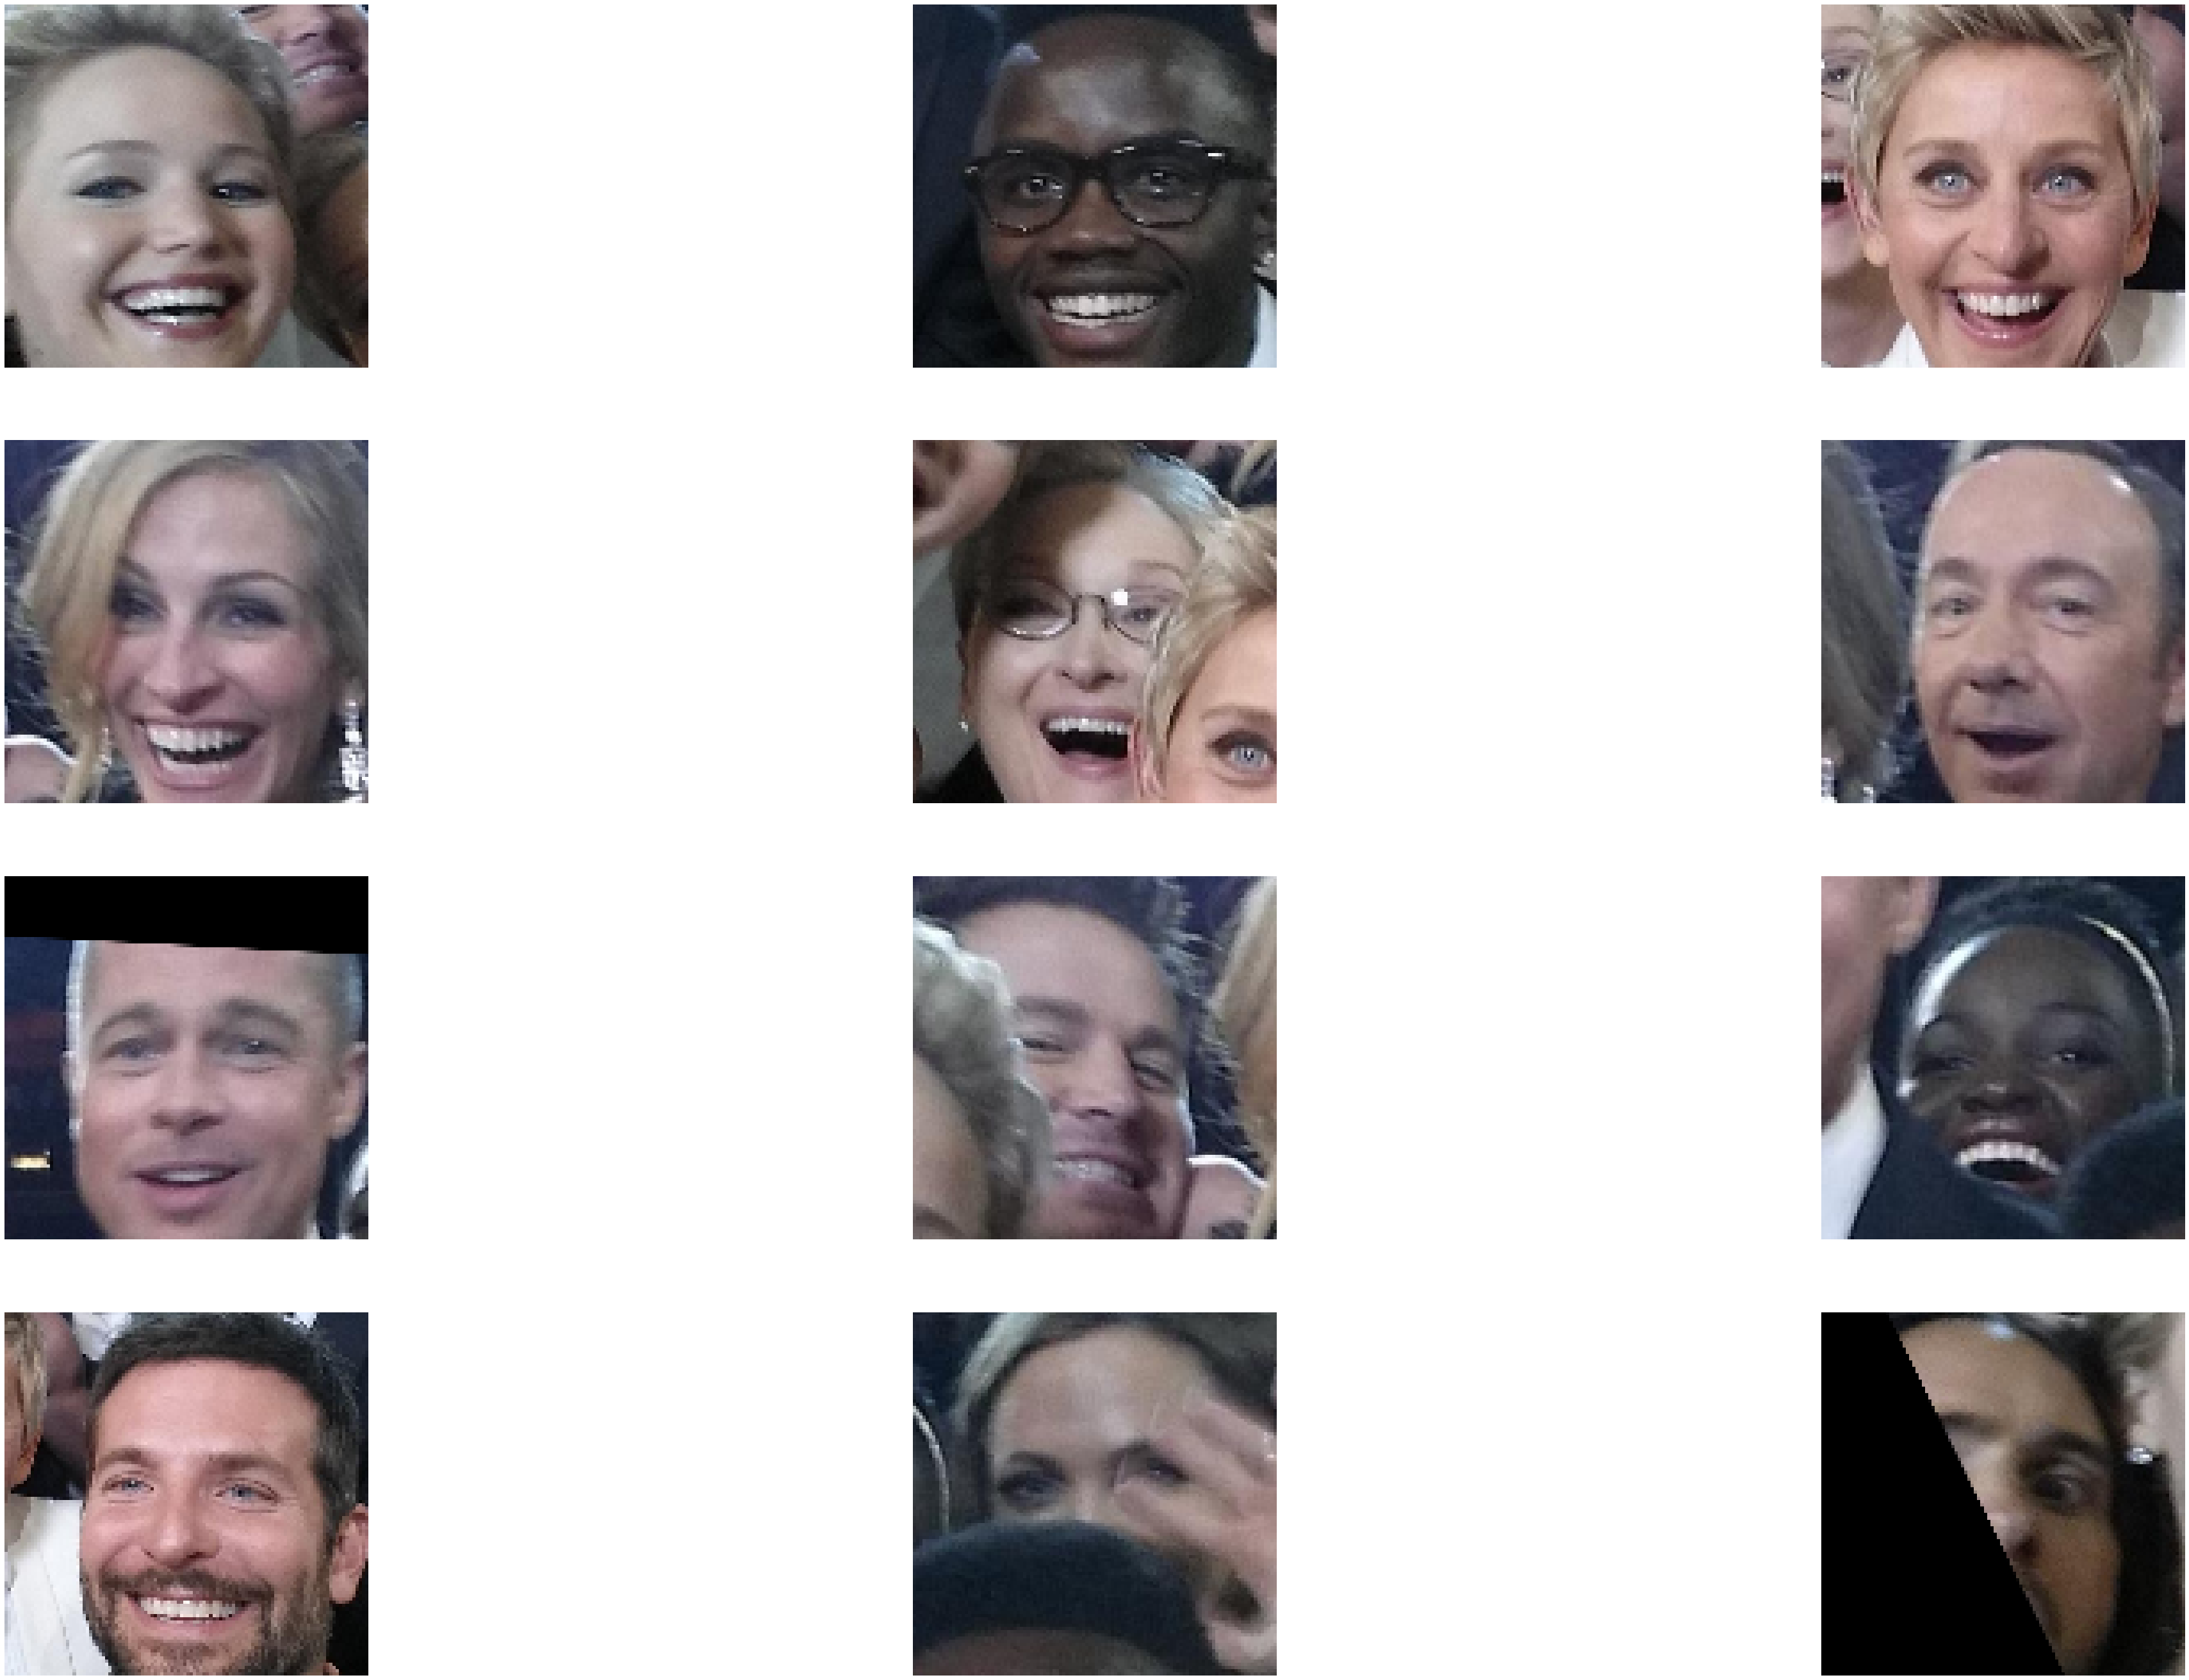

In [ ]:
photo.plot_crops(boxes, landmarks)
# show_images(crops, cols=4)

# Export -

In [ ]:
# hide
from nbdev.export import *
notebook2script()

Converted basic.ipynb.
Converted importers.EmailImporter.ipynb.
Converted importers.Importer.ipynb.
Converted importers.util.ipynb.
Converted index.ipynb.
Converted indexers.FaceClusteringIndexer.Models.ipynb.
Converted indexers.FaceClusteringIndexer.Utils.ipynb.
Converted indexers.FaceClusteringIndexer.indexer.ipynb.
Converted indexers.FaceRecognitionIndexer.ipynb.
Converted indexers.FacerecognitionIndexer.Photo.ipynb.
Converted indexers.GeoIndexer.ipynb.
Converted indexers.NoteListIndexer.NoteList.ipynb.
Converted indexers.NoteListIndexer.Parser.ipynb.
Converted indexers.NoteListIndexer.ipynb.
Converted indexers.NoteListIndexer.util.ipynb.
Converted indexers.indexer.ipynb.
Converted itembase.ipynb.
Converted pod.client.ipynb.
